# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [147]:
# Use this space for any additional import statements you need
from lexical_diversity import lex_div as ld
from matplotlib import pyplot as plt
import nltk


In [3]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
#all_language_emojis = set()

#for country in emoji.is_emoji : 
#    for em in emoji.is_emoji[country] : 
#        all_language_emojis.add(em)

# and now our functions

def is_emoji(s):
    return(emoji.is_emoji(s))

def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]

    return(len(emojis) > 0)

def remove_stop(tokens) :
    # modify this function to remove stopwords
    return(tokens)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


In [153]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. 
    """
    
    tokens = str(tokens).split()
    
    # Fill in the correct values here. 
    num_tokens = len(tokens)
    #code beolow from: https://stackoverflow.com/
    #questions/33726361/counting-the-number-of-
    #unique-words-in-a-list
    set_num_tokens = set(tokens)
    num_unique_tokens = len(set_num_tokens)
    #below code from: https://pypi.org/project/lexical-diversity/
    lexical_diversity = ld.ttr(tokens)
    #source: https://stackoverflow.com/questions/25934586/
    #finding-the-amount-of-characters-of-all-words-in-a-
    #list-in-python
    num_characters = sum(len(i) for i in tokens)
    
    #this is from the module 3.1 presentation
    top_words = nltk.FreqDist(tokens).most_common(5)
  
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"The top 5 words are {top_words} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [154]:
def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    text = text.lower().strip().split()
    text = [w for w in text if w not in sw and w.isalpha]
    
    return(text)

## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [155]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "" # change to your location if it is not in the same directory as your notebook
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [156]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [157]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2], ignore_index=True)
    
del(twitter_data_2)

In [158]:
twitter_data.head(3)

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher


In [159]:
lyrics_data = pd.DataFrame()

In [160]:
#I could not figure out how to do this with a 
#dataframe so I modified my code from assignment 2
#where the key is the song name
#and the lyrics are the value
#source for reading specific lines:
#https://www.geeksforgeeks.org/how-
#to-read-specific-lines-from-a-file-in-python/
#sources for using .strip for []:
#https://theprogrammingexpert.com/remove-brackets-
#from-string-python/#:~:text=Using%20strip()
#%20to%20Remove,and%20end%20of%20a%20string.

lyrics_data1 = defaultdict(list)


def storeLyrics(lyrics):

    with os.scandir('C:/Users/munip/Downloads/MADS-509-Module-2/lyrics/' + lyrics) as entries:
        for entry in entries:
            entryname = entry.name
            with open('C:/Users/munip/Downloads/MADS-509-Module-2/lyrics/' + lyrics + "/" + entryname) as file:
                contents = file.readline().strip()
                contents = contents.strip('"')
                x = file.readlines()
                value = str(x[3:]).strip("[]")
                value = value.strip('"')
                lyrics_data1[contents].append(value)
                
                
                
            

In [161]:
#cher to dictionary
storeLyrics('cher')

In [162]:
#cher to dataframe
#source for turning this into a dataframe:
#https://stackoverflow.com/questions/68705455/
#turning-a-dictionary-with-one-key-and-multiple
#-values-to-pandas-dataframe

lyrics_data = (pd.DataFrame.from_dict(lyrics_data1, orient='index').T
   .melt(var_name='song', value_name='lyrics'))


In [163]:
lyrics_data.head(3)

,song,lyrics
0,88 Degrees,"Stuck in L.A., ain't got no friends \n"", 'And ..."
1,A Different Kind Of Love Song,'What if the world was crazy and I was sane\n'...
2,After All,"'Well, here we are again\n', 'I guess it must ..."


In [164]:
lyrics_data['artist'] = "cher"

In [165]:
lyrics_data.head(3)

,song,lyrics,artist
0,88 Degrees,"Stuck in L.A., ain't got no friends \n"", 'And ...",cher
1,A Different Kind Of Love Song,'What if the world was crazy and I was sane\n'...,cher
2,After All,"'Well, here we are again\n', 'I guess it must ...",cher


In [166]:
#doing the same for Robyn
#storing lyrics data
#with song name as key

#I feel like there is a more efficient way
#of doing this,
#but I spent too much of time trying to figure this out
#so for now, I will keep what works

In [167]:
#updated file name to lyrics_data2 in both
#below and in the storeLyrics function
#this is so that we can do artist = robyn
#in the dataframe
lyrics_data2 = defaultdict(list)


def storeLyrics(lyrics):

    with os.scandir('C:/Users/munip/Downloads/MADS-509-Module-2/lyrics/' + lyrics) as entries:
        for entry in entries:
            entryname = entry.name
            with open('C:/Users/munip/Downloads/MADS-509-Module-2/lyrics/' + lyrics + "/" + entryname) as file:
                contents = file.readline().strip()
                contents = contents.strip('"')
                x = file.readlines()
                value = str(x[3:]).strip("[]")
                value = value.strip('"')
                lyrics_data2[contents].append(value)

In [168]:
#calling function for robyn
storeLyrics('robyn')

In [169]:
#robyn to dataframe
#source for turning this into a dataframe:
#https://stackoverflow.com/questions/68705455/
#turning-a-dictionary-with-one-key-and-multiple
#-values-to-pandas-dataframe

lyrics_data2 = (pd.DataFrame.from_dict(lyrics_data2, orient='index').T
   .melt(var_name='song', value_name='lyrics'))

In [170]:
lyrics_data2['artist'] = "robyn"

In [178]:
lyrics_data2.head(3)

,song,lyrics,artist
0,88 Days,"'I light a candle in the morning \n', 'To sign...",robyn
1,Ain't No Thing,"'[Verse 1:]\n', 'Boy you gotta want me, really...",robyn
2,Anytime You Like,"It's like you're waiting for me to start\n"", ""...",robyn


In [179]:
#as seen with twitter data above
#we will concat the 2 dataframes

#added ignore_index = true from source:
#https://stackoverflow.com/questions/
#35528119/pandas-recalculate-index
#-after-a-concatenation when I saw that 
#the index does not reset - did that for twitter
#as well

lyrics_data = pd.concat([
    lyrics_data,lyrics_data2], ignore_index=True)
    
del(lyrics_data2)

In [180]:
lyrics_data.head(5)

,song,lyrics,artist,tokens,num_tokens
0,88 Degrees,"Stuck in L.A., ain't got no friends \n"", 'And ...",cher,"[stuck, la, aint, got, friends, n, hollywood, ...",246.0
1,A Different Kind Of Love Song,'What if the world was crazy and I was sane\n'...,cher,"[world, crazy, sanen, would, strangen, cant, b...",145.0
2,After All,"'Well, here we are again\n', 'I guess it must ...",cher,"[well, againn, guess, must, faten, weve, tried...",146.0
3,Again,"'Again evening finds me at your door \n', 'Her...",cher,"[evening, finds, door, n, ask, n, could, try, ...",48.0
4,Alfie,"What's it all about, Alfie?\n"", 'Is it just fo...",cher,"[whats, alfien, moment, liven, whats, sort, al...",69.0


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove punctuation
* Split on whitespace
* Remove stopwords (optional)

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove punctuation other than emojis or hashtags
* Split on whitespace
* Remove stopwords

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [181]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5
#saw in the announcements to remove punctuation from 
#the NLTK list, but wasn't too sure what that meant

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [182]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [183]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
2449555,cher,You came in like a wave when I was feeling alr...,"[came, like, wave, feeling, alright, 💜]"
4051728,robyn,Trust & Respect ✊ ❤️,"[trust, respect, ✊, ❤️]"
703306,cher,Tired of the political bullshit. Was just a vo...,"[tired, political, bullshit, voter, trump, mad..."
1162940,cher,2k18🥀,[2k18🥀]
950287,cher,Lover of all things musical theatre. Eats way ...,"[lover, things, musical, theatre, eats, way, m..."
2573533,cher,•2015🎓 senior✌ •college freshman🤓 snapchat❣️: ...,"[•2015🎓, senior✌, •college, freshman🤓, snapcha..."
3623651,cher,hi my name is siobhan i am 31 I am engaged to ...,"[hi, name, siobhan, 31, engaged, alan, mcmilla..."
4195541,robyn,She/her. Lover of all things that make us feel...,"[sheher, lover, things, make, us, feel, better..."
1154494,cher,"Mom of 3, no filter I say what I feel, I love ...","[mom, 3, filter, say, feel, love, jesus, cuss,..."
3933824,cher,Live life passionately ❤ Laugh out loud ❤ Love...,"[live, life, passionately, ❤, laugh, loud, ❤, ..."


In [184]:
lyrics_data.head(3)

,song,lyrics,artist,tokens,num_tokens
0,88 Degrees,"Stuck in L.A., ain't got no friends \n"", 'And ...",cher,"[stuck, la, aint, got, friends, n, hollywood, ...",246
1,A Different Kind Of Love Song,'What if the world was crazy and I was sane\n'...,cher,"[world, crazy, sanen, would, strangen, cant, b...",145
2,After All,"'Well, here we are again\n', 'I guess it must ...",cher,"[well, againn, guess, must, faten, weve, tried...",146


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: 

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


I am going to assume that this is for different songs 
so I will just do 2 cher songs to compare how similar
her 2 songs are to one another

I ended up comparing 5 sets of lyrics,
4 cher songs and 1 robyn song.
This is because when I tested the first two
cher songs, the results were identical so i thought I had
an issue with my descriptive stats function.
I then decided to test with 1 robyn song and 
2 more cher songs to verify. It looks like the
there are some differences, but I still have some doubts.
Maybe cher just likes to use the same number of stanzas 
for each song? not too sure

In [185]:
#selecting first 2 rows of the data frame
#source: https://www.geeksforgeeks.org/
#get-the-first-3-rows-of-a-given-dataframe/

cher_2_songs = lyrics_data.iloc[[0,1,2,4,29]]


In [186]:
cher_2_songs.head()

,song,lyrics,artist,tokens,num_tokens
0,88 Degrees,"Stuck in L.A., ain't got no friends \n"", 'And ...",cher,"[stuck, la, aint, got, friends, n, hollywood, ...",246
1,A Different Kind Of Love Song,'What if the world was crazy and I was sane\n'...,cher,"[world, crazy, sanen, would, strangen, cant, b...",145
2,After All,"'Well, here we are again\n', 'I guess it must ...",cher,"[well, againn, guess, must, faten, weve, tried...",146
4,Alfie,"What's it all about, Alfie?\n"", 'Is it just fo...",cher,"[whats, alfien, moment, liven, whats, sort, al...",69
29,Big City,"Lately shit's been driving me crazy\n"", ""Won't...",robyn,"[lately, shits, driving, crazyn, wont, take, o...",199


In [187]:
#getting the lyrics from the description

for i in range (0,5):
    
    lyrcs = str(cher_2_songs['tokens'].iloc[[i]])
    print(lyrcs)
    descriptive_stats(lyrcs)
    print("\n")


0    [stuck, la, aint, got, friends, n, hollywood, ...
Name: tokens, dtype: object
There are 13 tokens in the data.
There are 13 unique tokens in the data.
There are 67 characters in the data.
The lexical diversity is 1.000 in the data.
The top 5 words are [('0', 1), ('[stuck,', 1), ('la,', 1), ('aint,', 1), ('got,', 1)] in the data.


1    [world, crazy, sanen, would, strangen, cant, b...
Name: tokens, dtype: object
There are 12 tokens in the data.
There are 12 unique tokens in the data.
There are 68 characters in the data.
The lexical diversity is 1.000 in the data.
The top 5 words are [('1', 1), ('[world,', 1), ('crazy,', 1), ('sanen,', 1), ('would,', 1)] in the data.


2    [well, againn, guess, must, faten, weve, tried...
Name: tokens, dtype: object
There are 12 tokens in the data.
There are 12 unique tokens in the data.
There are 68 characters in the data.
The lexical diversity is 1.000 in the data.
The top 5 words are [('2', 1), ('[well,', 1), ('againn,', 1), ('guess,', 1), ('mu

Q: what observations do you make about these data? 

A: 


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

#### Used Guidance from Module 3.1 Presentation

for robyn lyrics

for cher twitter

for robyn twitter

Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: 

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [188]:
from matplotlib import pyplot as plt
counting = 1

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        #tokens = str(df[column]).split()
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    print(counting)
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

Dataframe for cher lyrics data

In [189]:
#this was actually from code I did not 
#use in the last assignment, but commented out lol
#source:
#https://towardsdatascience.com/
#select-data-in-python-pandas-
#easily-with-loc-iloc-c6e8bc979e3e

cher_lyrics_for_cloud = lyrics_data.loc[lyrics_data['artist'] == 'cher']

In [190]:
cher_lyrics_for_cloud.head()

,song,lyrics,artist,tokens,num_tokens
0,88 Degrees,"Stuck in L.A., ain't got no friends \n"", 'And ...",cher,"[stuck, la, aint, got, friends, n, hollywood, ...",246
1,A Different Kind Of Love Song,'What if the world was crazy and I was sane\n'...,cher,"[world, crazy, sanen, would, strangen, cant, b...",145
2,After All,"'Well, here we are again\n', 'I guess it must ...",cher,"[well, againn, guess, must, faten, weve, tried...",146
3,Again,"'Again evening finds me at your door \n', 'Her...",cher,"[evening, finds, door, n, ask, n, could, try, ...",48
4,Alfie,"What's it all about, Alfie?\n"", 'Is it just fo...",cher,"[whats, alfien, moment, liven, whats, sort, al...",69


In [191]:
#putting cher_lyrics_for_cloud through
#the count_words dataframe

cher_count_words = count_words(cher_lyrics_for_cloud)

1


In [192]:
#checking output
cher_count_words.head(10)

,freq
token,
n,308
bang,77
dont,54
youn,48
love,42
im,38
baby,35
youre,28
want,25


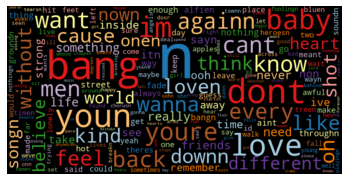

In [193]:
wordcloud(cher_count_words['freq'])

Now for robyn!

In [194]:
#this was actually from code I did not 
#use in the last assignment, but commented out lol
#source:
#https://towardsdatascience.com/
#select-data-in-python-pandas-
#easily-with-loc-iloc-c6e8bc979e3e

robyn_lyrics_for_cloud = lyrics_data.loc[lyrics_data['artist'] == 'robyn'].reset_index()

In [195]:
robyn_lyrics_for_cloud.head(3)

,index,song,lyrics,artist,tokens,num_tokens
0,21,88 Days,"'I light a candle in the morning \n', 'To sign...",robyn,"[light, candle, morning, n, signify, still, mi...",219
1,22,Ain't No Thing,"'[Verse 1:]\n', 'Boy you gotta want me, really...",robyn,"[verse, 1n, boy, gotta, want, really, really, ...",76
2,23,Anytime You Like,"It's like you're waiting for me to start\n"", ""...",robyn,"[like, youre, waiting, startn, theres, right, ...",130


In [196]:
#putting robyn_lyrics_for_cloud through
#the count_words dataframe

robyn_count_words = count_words(robyn_lyrics_for_cloud)

1


In [197]:
#checking that the word frequency for robyn
#has words
robyn_count_words.head(3)

,freq
token,
n,171
dont,51
got,49


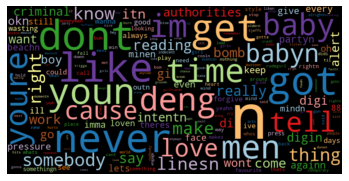

In [198]:
#Yay! This is so cool - I'm a fan
wordcloud(robyn_count_words['freq'])

Making word clouds for twitter data

In [199]:
#for cher twitter
cher_twitter_for_cloud = twitter_data.loc[twitter_data['artist'] == 'cher']

In [200]:
cher_twitter_for_cloud.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist,tokens,num_tokens,has_emoji
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher,[nan],1,False
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]",6,False
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]",3,True
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher,[csu],1,False
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher,"[writer, washinformer, spelmancollege, alumna,...",17,False


In [201]:
cher__twitter_count_words = count_words(cher_twitter_for_cloud)

1


In [203]:
#this took a litle over 2 hours to run but
#I forgot to look for removing nans and
#for some reason numbers showed up, whoops
#whole lotta foreign fans though 
cher__twitter_count_words.head(10)

,freq
token,
nan,1994031
love,213522
im,139051
life,122679
music,86733
de,72970
follow,62166
lover,60191
like,58566


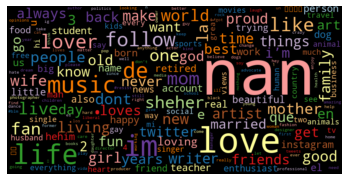

In [204]:
wordcloud(cher__twitter_count_words['freq'])

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: 